**Connection with colab**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1w7DTbCQ7vndxMJpB906L634uZuWR1XQe'}) # replace the id with id of file you want to access
downloaded.GetContentFile('diabetes.csv')

**Import all the python library**

In [ ]:
import pandas as pd
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt

**Data processing**

In [ ]:
data_frame = pd.read_csv('diabetes.csv')

In [ ]:
data_frame.shape

(1543, 8)

In [ ]:
data_frame.head(3)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1


In [ ]:
data_frame.tail(3)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1540,163,70,18,105,31.6,0.268,28,1
1541,145,88,34,165,30.3,0.771,53,1
1542,125,86,0,0,37.6,0.304,51,0


In [ ]:
data_frame.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Missing data chicking**

In [ ]:
print(data_frame.isnull().values.any())                  #dataset e kono faka set ache ki na ta dekhar jonne

False


In [ ]:
data_frame.corr() # It will show correlation matrix/confusion matrix

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.151239,0.075713,0.336236,0.235963,0.142019,0.279649,0.471895
BloodPressure,0.151239,1.000000,0.205475,0.098914,0.281432,0.047825,0.224290,0.061310
SkinThickness,0.075713,0.205475,1.000000,0.435818,0.381263,0.186098,-0.091321,0.077911
Insulin,0.336236,0.098914,0.435818,1.000000,0.200161,0.195811,-0.022920,0.139804
BMI,0.235963,0.281432,0.381263,0.200161,1.000000,0.130877,0.057919,0.307287
DiabetesPedigreeFunction,0.142019,0.047825,0.186098,0.195811,0.130877,1.000000,0.043338,0.180493
Age,0.279649,0.224290,-0.091321,-0.022920,0.057919,0.043338,1.000000,0.260005
Outcome,0.471895,0.061310,0.077911,0.139804,0.307287,0.180493,0.260005,1.000000


In [ ]:
data_frame.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,120.568373,68.713545,20.197667,78.747894,31.898315,0.474135,32.962411,0.343487
std,31.906545,19.569083,16.195040,115.254461,7.717939,0.338453,11.577344,0.475026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.100000,0.238500,24.000000,0.000000
50%,116.000000,72.000000,22.000000,23.000000,32.000000,0.374000,29.000000,0.000000
75%,140.000000,80.000000,32.000000,126.000000,36.500000,0.630500,40.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data_frame['Outcome'].value_counts()

0    1013
1     530
Name: Outcome, dtype: int64

**Data visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


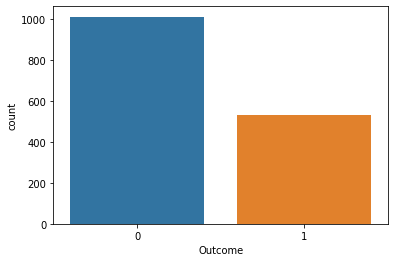

In [ ]:
sns.countplot(data_frame['Outcome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

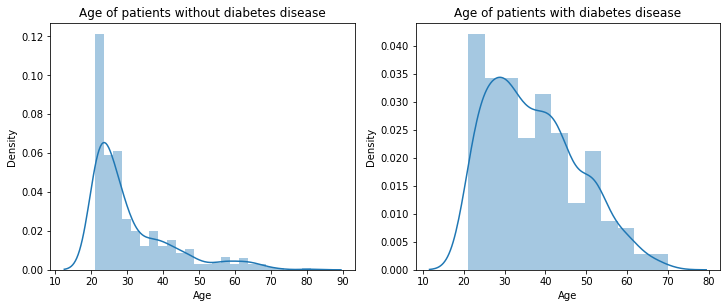

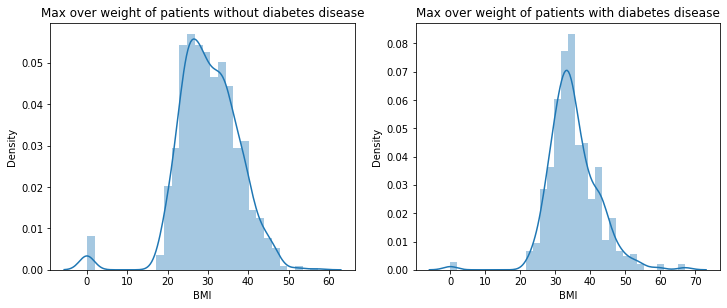

In [ ]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(data_frame[data_frame['Outcome']==0].Age)
plt.title('Age of patients without diabetes disease')
plt.subplot(222)
sns.distplot(data_frame[data_frame['Outcome']==1].Age)
plt.title('Age of patients with diabetes disease')

plt.figure(figsize=(12,10))
plt.subplot(223)
sns.distplot(data_frame[data_frame['Outcome']==0].BMI)
plt.title('Max over weight of patients without diabetes disease')
plt.subplot(224)
sns.distplot(data_frame[data_frame['Outcome']==1].BMI)
plt.title('Max over weight of patients with diabetes disease')
plt.show()

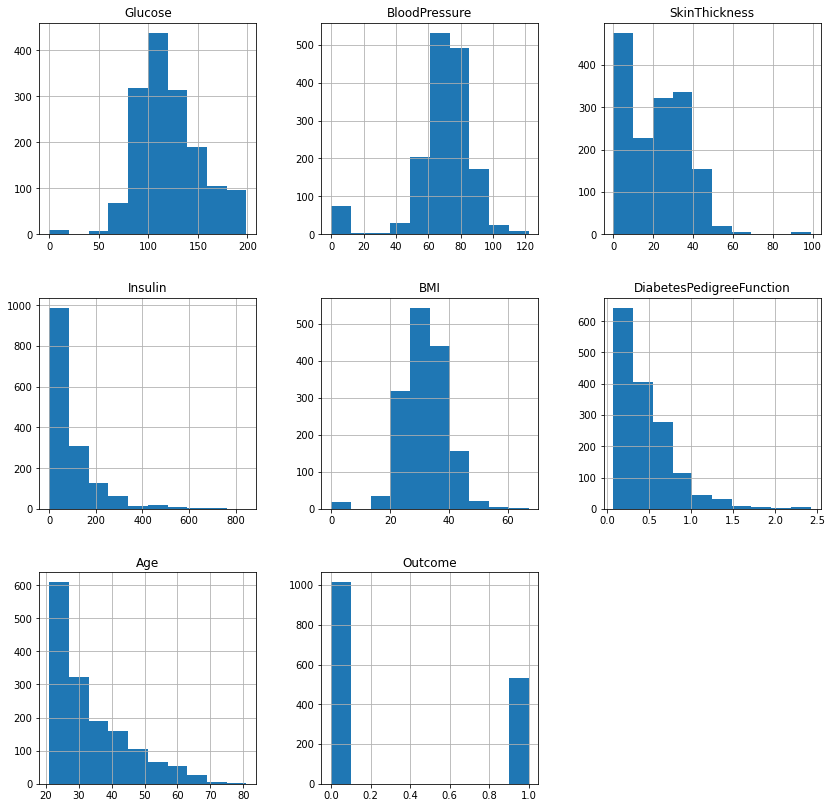

In [ ]:
data_frame.hist(figsize=(14,14))
plt.show()

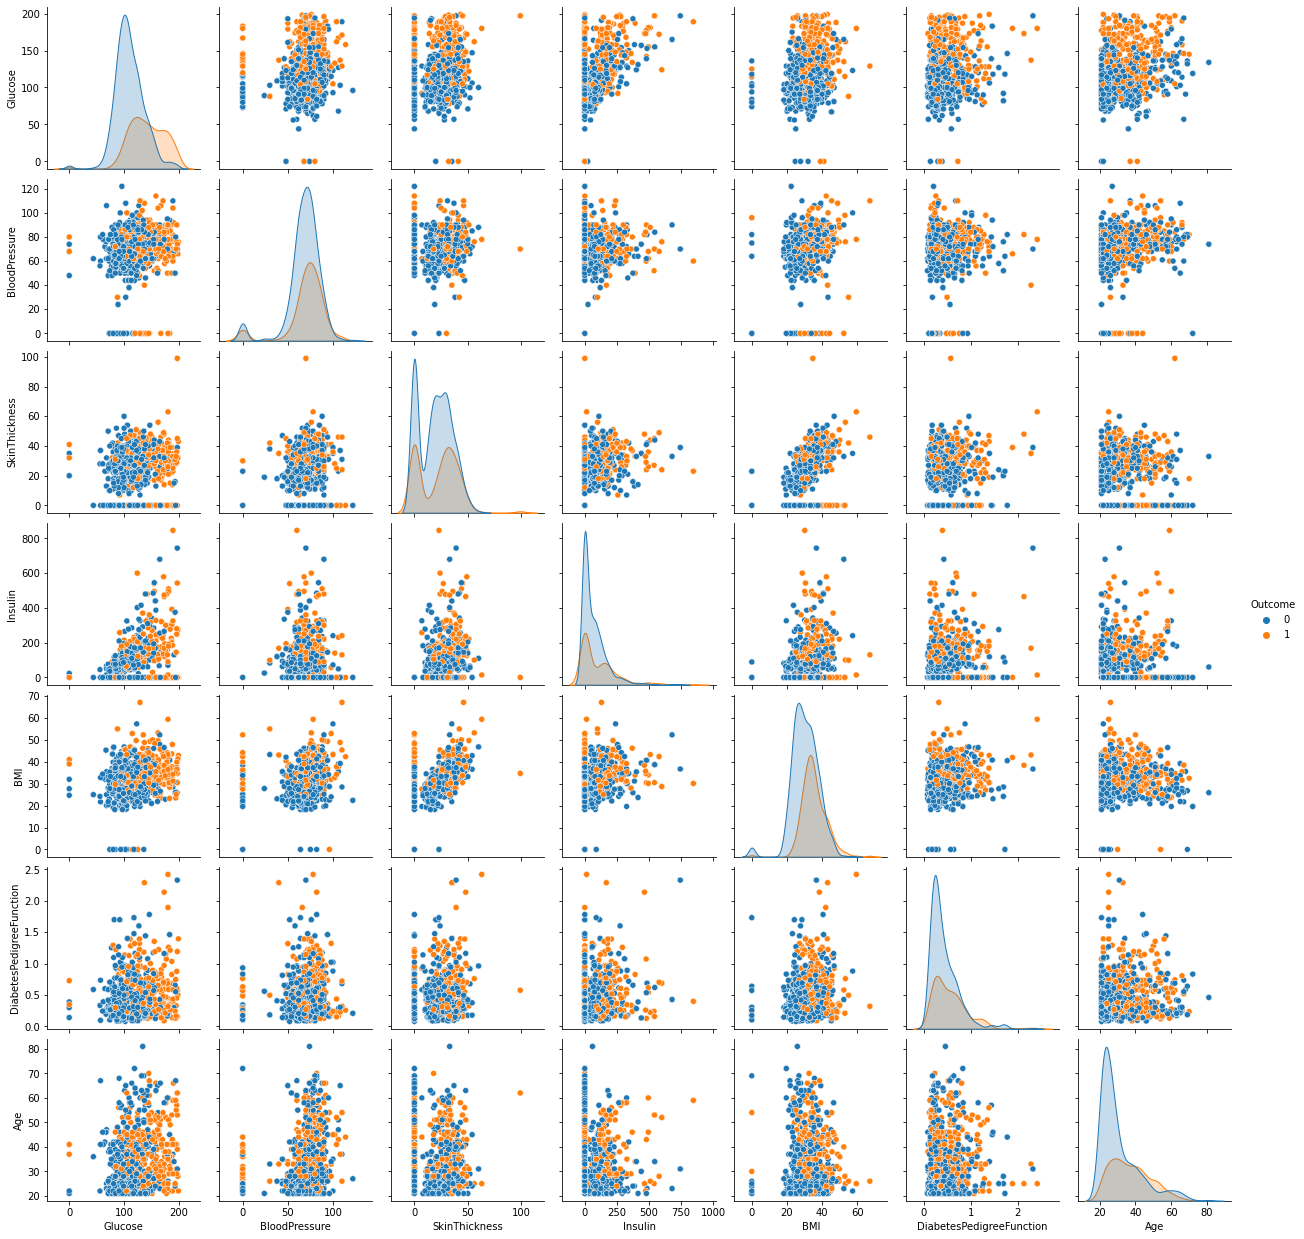

In [ ]:
# Pairplot 
sns.pairplot(data = data_frame, hue = 'Outcome')
plt.show()

In [ ]:
# Here size means plot-size
def corr_heatmap(data_frame, size=11):
  # Getting correlation using Pandas
  correlation = data_frame.corr()

  # Dividing the plot into subplots for increasing size of plots
  fig, heatmap = plt.subplots(figsize=(size, size))

  # Plotting the correlation heatmap
  heatmap.matshow(correlation)

  # Adding xticks and yticks
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)

  # Displaying the graph
  plt.show()

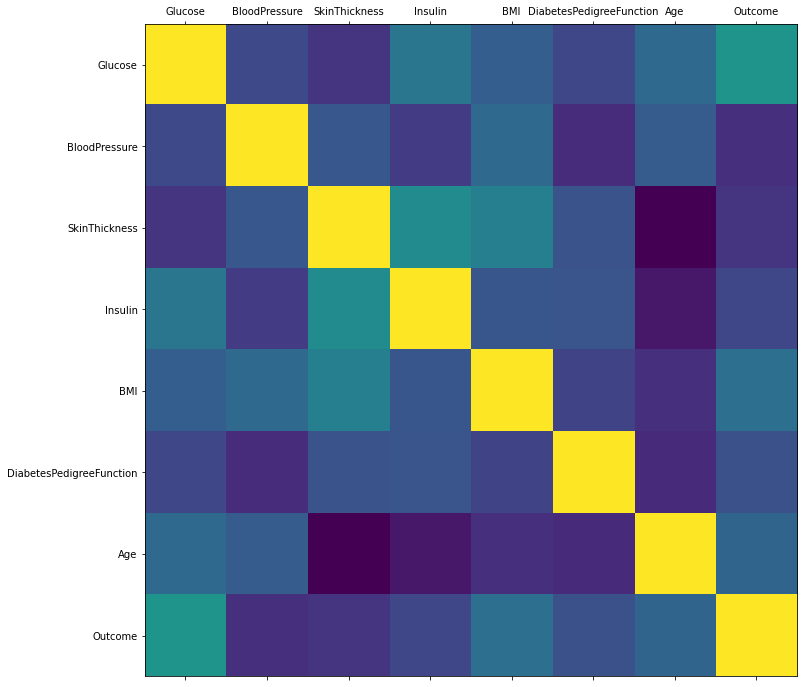

In [ ]:
corr_heatmap(data_frame,12)

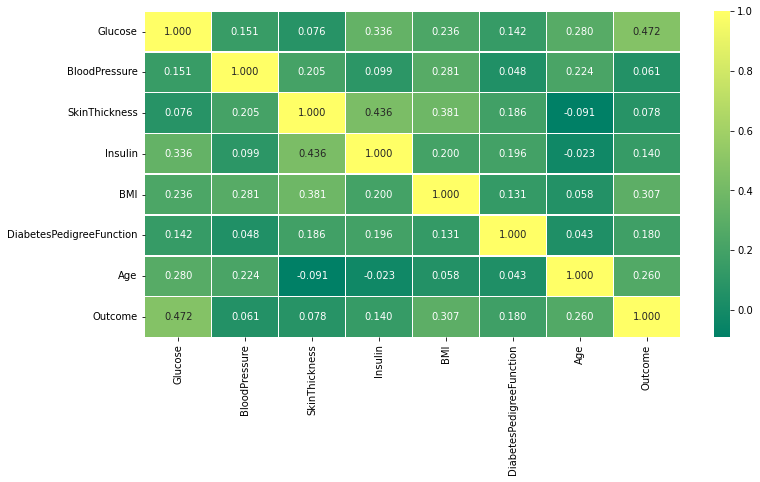

In [ ]:
plt.figure(figsize=(12,6))
corr = data_frame.corr()
sns.heatmap(corr,annot=True, fmt ='.3f',linewidths=.5, cmap='summer')
plt.show()

**Split the dataset**

In [ ]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

feature_column_names = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

predicted_class_name = ['Outcome']


# Getting feature variable values

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 0.10

# Splitting using scikit-learn train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 60)

In [ ]:
print("{:.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{:.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

89.95% in training set
10.05% in test set


**Missing data chicking**

In [ ]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing Glucose: {0}".format(len(data_frame.loc[data_frame['Glucose'] == 0])))
print("# rows missing BloodPressure: {0}".format(len(data_frame.loc[data_frame['BloodPressure'] == 0])))
print("# rows missing Thickness: {0}".format(len(data_frame.loc[data_frame['SkinThickness'] == 0])))
print("# rows missing Insulin: {0}".format(len(data_frame.loc[data_frame['Insulin'] == 0])))
print("# rows missing BMI: {0}".format(len(data_frame.loc[data_frame['BMI'] == 0])))
print("# rows missing DiabetesPedigreeFunction: {0}".format(len(data_frame.loc[data_frame['DiabetesPedigreeFunction'] == 0])))
print("# rows missing Age: {0}".format(len(data_frame.loc[data_frame['Age'] == 0])))

# rows in dataframe 1543
# rows missing Glucose: 10
# rows missing BloodPressure: 74
# rows missing Thickness: 469
# rows missing Insulin: 757
# rows missing BMI: 19
# rows missing DiabetesPedigreeFunction: 0
# rows missing Age: 0


**Missing data filled up**

In [ ]:
#from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer
#Impute with mean all 0 readings
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [ ]:
X_train[:10] 

**Select the right machine learning algorithm**

**Decision tree Algorithm**

In [ ]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
decisionTree_model = DecisionTreeClassifier(random_state =42)
decisionTree_model.fit(X_train, y_train.ravel())


#decisionTree= DecisionTreeClassifier(criterion = 'gini', random_state = 80)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn import metrics
decisionTree_predict_train = decisionTree_model.predict(X_train)

#get accuracy
decisionTree_accuracy = metrics.accuracy_score(y_train, decisionTree_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(decisionTree_accuracy))

Accuracy: 1.0000


In [ ]:
decisionTree_predict_test = decisionTree_model.predict(X_test)

#get accuracy
decisionTree_accuracy_testdata = metrics.accuracy_score(y_test, decisionTree_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(decisionTree_accuracy_testdata))

Accuracy: 0.9742


In [ ]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test,decisionTree_predict_test, labels = [1,0])))
print(" ")

print(" Classification Report ")
print(metrics.classification_report(y_test,decisionTree_predict_test, labels = [1,0]))

Confusion Matrix
[[ 47   1]
 [  3 104]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.94      0.98      0.96        48
           0       0.99      0.97      0.98       107

    accuracy                           0.97       155
   macro avg       0.97      0.98      0.97       155
weighted avg       0.97      0.97      0.97       155



**Random forest**


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 1.0000


In [ ]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.9806


In [ ]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1,0])))
print(" ")

print(" Classification Report ")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1,0]))

Confusion Matrix
[[ 47   1]
 [  2 105]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.96      0.98      0.97        48
           0       0.99      0.98      0.99       107

    accuracy                           0.98       155
   macro avg       0.97      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155



**Logistic Regrassion**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a RandomForestClassifier object
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train.ravel())



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_predict_train = lr_model.predict(X_train)

#get accuracy
lr_accuracy = metrics.accuracy_score(y_train, lr_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(lr_accuracy))

Accuracy: 0.7788


In [ ]:
lr_predict_test = lr_model.predict(X_test)

#get accuracy
lr_accuracy_testdata = metrics.accuracy_score(y_test, lr_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(lr_accuracy_testdata))


Accuracy: 0.8387


In [ ]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1,0])))
print(" ")

print(" Classification Report ")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1,0]))

Confusion Matrix
[[ 47   1]
 [  2 105]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.96      0.98      0.97        48
           0       0.99      0.98      0.99       107

    accuracy                           0.98       155
   macro avg       0.97      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155



** K nearest neighbors Algorithm**

In [ ]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [ ]:
knn_predict_train = knn_model.predict(X_train)

#get accuracy
knn_accuracy = metrics.accuracy_score(y_train, knn_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(knn_accuracy))

Accuracy: 0.7831


In [ ]:
knn_predict_test = knn_model.predict(X_test)

#get accuracy
knn_accuracy_testdata = metrics.accuracy_score(y_test, knn_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(knn_accuracy_testdata))

Accuracy: 0.7935


In [ ]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1,0])))
print(" ")

print(" Classification Report ")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1,0]))

Confusion Matrix
[[ 47   1]
 [  2 105]]
 
 Classification Report 
              precision    recall  f1-score   support

           1       0.96      0.98      0.97        48
           0       0.99      0.98      0.99       107

    accuracy                           0.98       155
   macro avg       0.97      0.98      0.98       155
weighted avg       0.98      0.98      0.98       155



**Evaluating for multiple models**

In [ ]:
from sklearn.calibration import calibration_curve

In [ ]:
def model_comparison(X_train,X_test, y_train,y_test):
 
    lr = LogisticRegression()
  
    rf = RandomForestClassifier(n_estimators=100)
    
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),\
                      
                      (rf, 'Random Forest')]:
        clf.fit(X_train, y_train)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)
    
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s" % (name, ))
    
        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
    
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
    
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


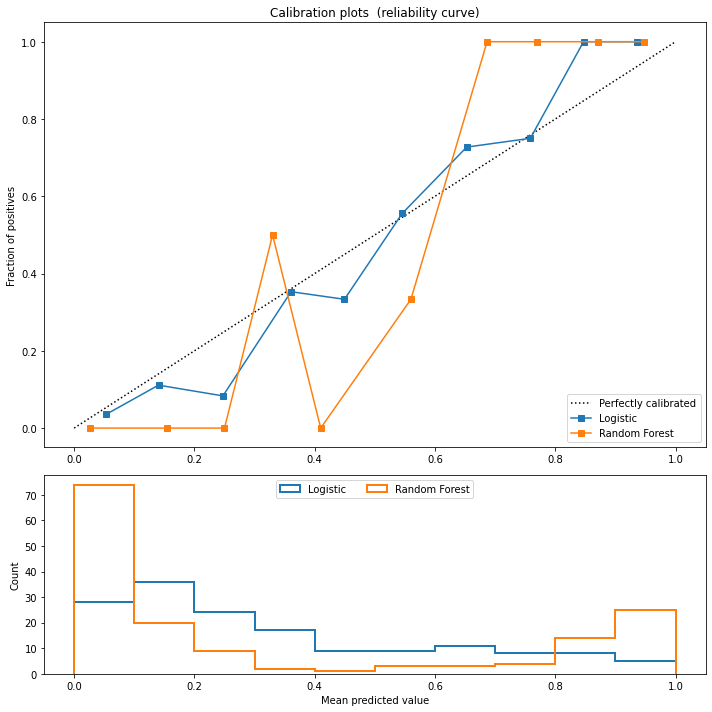

In [ ]:
model_comparison(X_train, X_test, y_train, y_test)